In [67]:
# Import libraries, graphing programs, and programs for machine learning

import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from pandas import Series,DataFrame




In [68]:
# Locate test and training data for titanic

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine = [train_df, test_df]

In [69]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
# Look at the information in each data file to see what type of data is in each column

train_df.info()

print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [73]:
# We want to see how each column correlates with survival
# to validate any assumptions we may already have 
# Right now we will work with the columns that do not have 
# any missing data and pivot them against eachother


train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [74]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [75]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [76]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


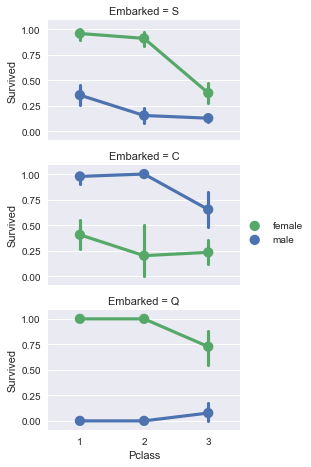

In [77]:
# We can plot Port of Embarkment
# we will add sex and PClass

# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

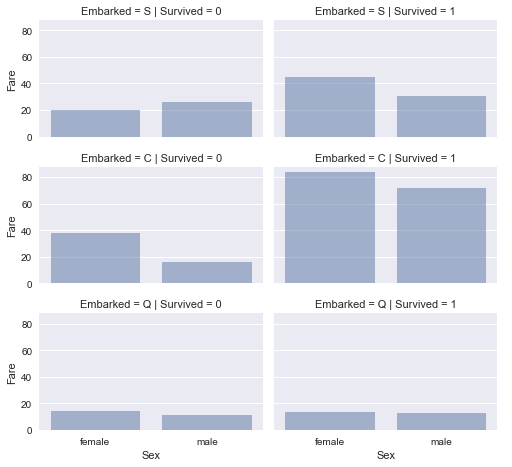

In [78]:
# Lets take another look at Port of Embarkment
# and add sex, and fare

# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [79]:
# Now that we have some ideas of what may correlate to survival
# Lets clean our data and prepare it for modeling

In [80]:
# Looking at the training data to see a count of how much data is in each column 
# so we can identify the # of unique variables and
# so we can identify where the missing data is
# and if we have duplicate data

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [81]:
# Looking at the test data to see a count of how much data is in each column 
# so we can identify the # of unique variables and
# so we can identify where the missing data is
# and if we have duplicate data

test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Rosenbaum, Miss. Edith Louise",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [82]:
# Dropping Ticket and Cabin in both datasets
# as this data will not be useful in 
# predicting survival

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]


In [83]:
# Since we are unable to use names in analyzing data
# we can retain the title feature to see if it can be
# useful in other ways

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [84]:
# Since there are many different titles
# we will replace some titles for more common titles

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Don', 'Dr', 'Major', 'Rev',\
        'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Sir', 'Capt', 'Col'], 'Mr')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Mme', 'Lady'], 'Mrs')
    
# Lets look at survival rate by title
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()    

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.157692
3,Mrs,0.796875
4,Rare,0.277778


In [85]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [87]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


In [88]:
# Converting titles into numeric values

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [89]:
# Now we can drop Name and PassengerID columns
# as they will no be useful in predicting survival

train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]


In [90]:
# Coverting Sex into numerical values

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [91]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,1
3,895,3,0,27.0,0,0,8.6625,S,1
4,896,3,1,22.0,1,1,12.2875,S,3


In [92]:
# To see if there is a correlation between survival
# and passengers traveling alone vs passengers with family members

# Creating new column "FamilySize" for passenger with famimly on board
# Creating new column "IsAlone" for passengers with no family on board

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [93]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,S,1,2,0
1,1,1,1,38.0,1,0,71.2833,C,3,2,0
2,1,3,1,26.0,0,0,7.9250,S,2,1,1
3,1,1,1,35.0,1,0,53.1000,S,3,2,0
4,0,3,0,35.0,0,0,8.0500,S,1,1,1


In [94]:
# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
train_df['Family'] =  train_df["Parch"] + train_df["SibSp"]
train_df['Family'].loc[train_df['Family'] > 0] = 1
train_df['Family'].loc[train_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0



In [95]:
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Family
886,0,2,0,27.0,0,0,13.00,S,5,1,1,0
887,1,1,1,19.0,0,0,30.00,S,2,1,1,0
888,0,3,1,NaN,1,2,23.45,S,2,4,0,1
889,1,1,0,26.0,0,0,30.00,C,1,1,1,0
890,0,3,0,32.0,0,0,7.75,Q,1,1,1,0


[<matplotlib.text.Text at 0xe171160>, <matplotlib.text.Text at 0x1122ca58>]

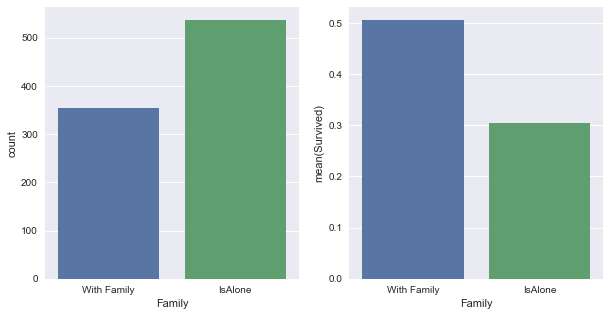

In [96]:
# Let take a look at the relationship between
# survival and family vs being alone

fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

sns.countplot(x='Family', data=train_df, order=[1,0], ax=axis1)

family_perc = train_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","IsAlone"], rotation=0)

In [97]:
# Lets take a look at the quality of the data now
# Counting each column looking for missing data

train_df.count()

Survived      891
Pclass        891
Sex           891
Age           714
SibSp         891
Parch         891
Fare          891
Embarked      889
Title         891
FamilySize    891
IsAlone       891
Family        891
dtype: int64

In [98]:
test_df.count()

PassengerId    418
Pclass         418
Sex            418
Age            332
SibSp          418
Parch          418
Fare           417
Embarked       418
Title          418
FamilySize     418
IsAlone        418
Family         418
dtype: int64

In [105]:
# We are missing data on the port of embarkment
# to fill in the missing data we will use
# the most common port of embarkment

freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [106]:
# Filling the missing values in port of embarkment with the most common

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

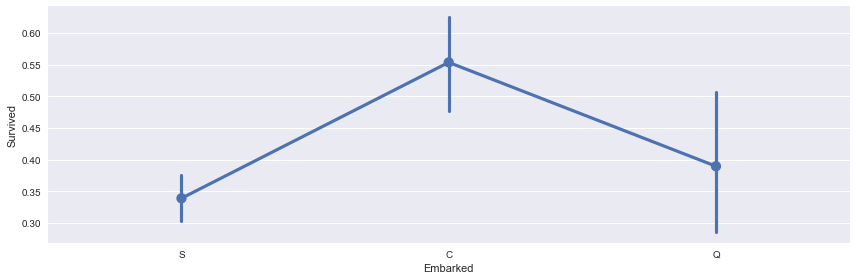

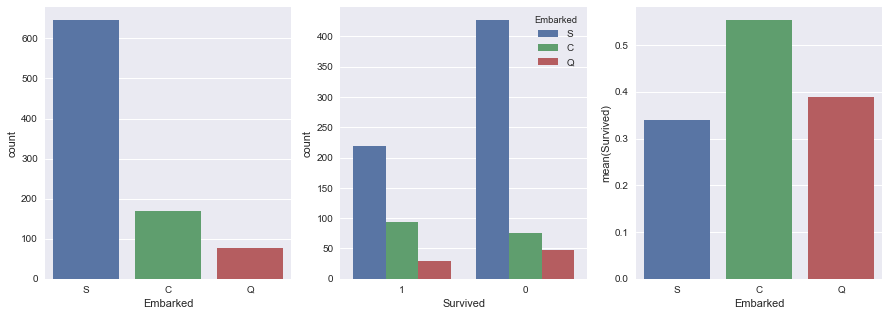

In [107]:
# Lets take a look at Port of Emarkment and survial

sns.factorplot('Embarked','Survived', data=train_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=train_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train_df, order=[1,0], ax=axis2)

embark_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

In [108]:
# To use port of embarkment in predicting survival
# we will convert port of embarkment to numerical values

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 3, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Family
0,0,3,0,22.0,1,0,7.2500,3,1,2,0,1
1,1,1,1,38.0,1,0,71.2833,1,3,2,0,1
2,1,3,1,26.0,0,0,7.9250,3,2,1,1,0
3,1,1,1,35.0,1,0,53.1000,3,3,2,0,1
4,0,3,0,35.0,0,0,8.0500,3,1,1,1,0


In [109]:
train_df.count()

Survived      891
Pclass        891
Sex           891
Age           714
SibSp         891
Parch         891
Fare          891
Embarked      891
Title         891
FamilySize    891
IsAlone       891
Family        891
dtype: int64

In [110]:
test_df.count()

PassengerId    418
Pclass         418
Sex            418
Age            332
SibSp          418
Parch          418
Fare           417
Embarked       418
Title          418
FamilySize     418
IsAlone        418
Family         418
dtype: int64

In [111]:
# The Fare column may be useful in predicting survival
# we need to fill in the missing fare value in the test data

# Filling missing fare values with median 
# and create a fare band of 4 bins

test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Family
0,0,3,0,22.0,1,0,7.2500,3,1,2,0,1
1,1,1,1,38.0,1,0,71.2833,1,3,2,0,1
2,1,3,1,26.0,0,0,7.9250,3,2,1,1,0
3,1,1,1,35.0,1,0,53.1000,3,3,2,0,1
4,0,3,0,35.0,0,0,8.0500,3,1,1,1,0


In [112]:
# Creating fare band

train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
test_df['FareBand'] = pd.qcut(test_df['Fare'], 4)
combine = [train_df, test_df]

In [113]:
# Convert fare band into nominal feature

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
test_df = test_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Family
0,0,3,0,22.0,1,0,1,3,1,2,0,1
1,1,1,1,38.0,1,0,4,1,3,2,0,1
2,1,3,1,26.0,0,0,2,3,2,1,1,0
3,1,1,1,35.0,1,0,4,3,3,2,0,1
4,0,3,0,35.0,0,0,2,3,1,1,1,0
5,0,3,0,NaN,0,0,2,2,1,1,1,0
6,0,1,0,54.0,0,0,4,3,1,1,1,0
7,0,3,0,2.0,3,1,3,3,4,5,0,1
8,1,3,1,27.0,0,2,2,3,3,3,0,1
9,1,2,1,14.0,1,0,3,1,3,2,0,1


In [114]:
test_df.count()

PassengerId    418
Pclass         418
Sex            418
Age            332
SibSp          418
Parch          418
Fare           418
Embarked       418
Title          418
FamilySize     418
IsAlone        418
Family         418
dtype: int64

In [34]:
# Looking at the data at this point
# we now need to address the missing information
# in the age column

train_df.count()

Survived      891
Pclass        891
Sex           891
Age           714
SibSp         891
Parch         891
Fare          891
Embarked      891
Title         891
FamilySize    891
IsAlone       891
dtype: int64

In [36]:
# Lets look at the average age of each title

train_df[['Title', 'Age']].groupby(['Title'], as_index=False).mean()    

,Title,Age
0,1,32.589776
1,2,21.845638
2,3,35.873874
3,4,4.574167
4,5,43.235294


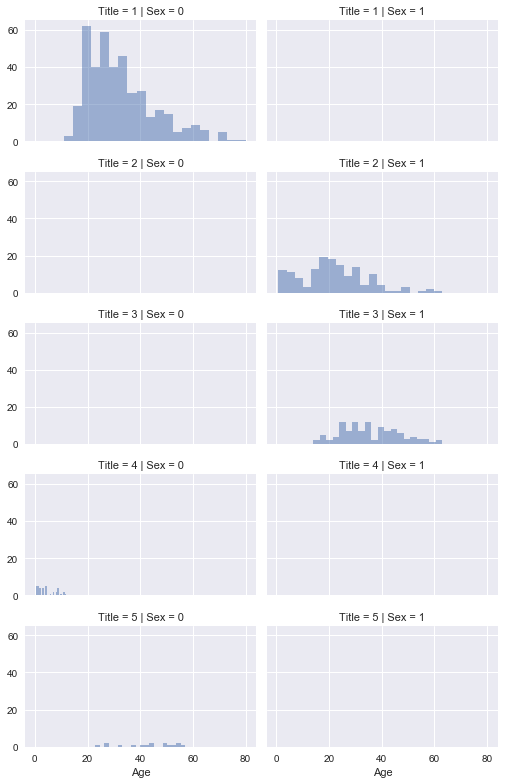

In [37]:
# Lets look at age, title and sex

# grid = sns.FacetGrid(train_df, col='Title', hue='Gender')

grid = sns.FacetGrid(train_df, row='Title', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()